# Simulação usando frequência normalizada F

Esse notebook tem por objetivo fazer a simulação do problema atravez da frequência normalizada F, por isso não usaremos $\lambda$ como parâmetro direto. 

In [2]:
# principais bibliotecas usadas para sistemas matemáticos
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# definindo as funções por partes:
def L_F(F1, gama):
    L = (gama**2)/(gama**2+F1**2)
    return L

def Au(u):
    A = (2*(10**3)*np.exp(-0.05*abs(u-1)**2.6))
    return A

def FHE(F, n, t, ni, u, rext):
    if ni > 1:
        F_HE = ((0.03/(n**0.3))*((2/ni)**1.2)*(abs(u-0.8))*
                (t/rext)+ni-1)
    elif ni == 1:
        F_HE = (abs(0.21+0.175*u-0.1/((u-0.35)**2))*
            (t*rext)**(0.55+5*0.001*np.sqrt(n**4-1))+
            0.04*np.sqrt(u)*(t/rext))
    return F_HE

def FEH(F, n, t, ni, u, rext):
    if ni >1:
        F_EH = (((11.5)/((ni**1.2)*(7.75-ni)))*
            ((0.34+((u/4)*((n/1.2)**1.15)))/((u+0.2/n)**0.15))*
                (1/rext)**
                (0.75+(0.06/(n**1.15))+0.1*np.sqrt(1.44/n)*(ni-2))+
                ni - 1)
    elif ni == 1:
        F_EH = ((0.73+0.57*((u**0.8+1.5)/4)-(0.04/(u-0.35)))*
            ((t/rext)**(0.5-(n-1)/(10*((u+0.5)**0.1)))))
    return F_EH

def CLmin(F, n, t, gama, ni, u, rext, R):
    Rco = R -2*rext
    CL = ((5*10**(-4))*((((2*t/F)*np.sqrt(n**2-1))**4.5)/(Rco**4))*
         ((1-t/rext)**(-12))*
         ((np.sqrt(n**2-1))/(t*np.sqrt(rext)))*
         np.exp((2*((2*t/F)*np.sqrt(n**2-1)))/(rext*(n**2-1))))
    return CL

def pv(F, n, t, gama, ni, u, rext, R):
    p_v = 0
    iteravel = np.arange(0,u+1,1)
    for u1 in iteravel:
        F1 = F
        F_HE = FHE(F, n, t, ni, u1, rext)
        F_EH = FEH(F, n, t, ni, u1, rext)
        L1 = L_F(F1-F_HE, gama)
        L2 = L_F(F1-F_EH, gama)
        p_vparcela = Au(u1)*(L1+L2)
        p_v += p_vparcela
    return p_v

def CL(F, n, t, gama, ni, u, rext, R):
    parametro_ni = np.arange(1,ni+1,1)
    CL = 0
    for ni1 in parametro_ni:
        CLparcela = (pv(F, n, t, gama, ni1, u, rext, R)*
              CLmin(F, n, t, gama, ni1, u, rext, R))
        CL+=CLparcela
    return CL

def parametros(rex, R, rexo, to, N=8):
    theta = 2*np.pi/N
    delta = np.sqrt(2*((R-rex)**2)*(1-np.cos(theta)))-2*rex
    #print("para o raio:",rex, "o delta é:", delta)
    t = rex - np.sqrt(rex**2-2*rexo*to+to**2)
    Rin = R-2*rex
    return delta, t, Rin

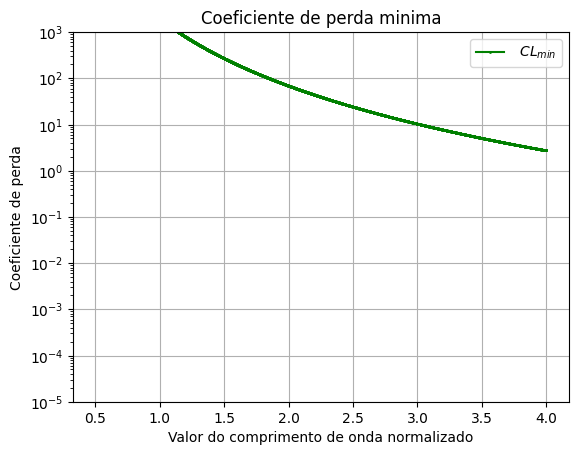

In [4]:
plt.figure()
t=10**(-6)
rext= 9*10**(-6)
R=20*10**(-6)
n=1.45
gama = 0.003
ni = 5
u=8
ff = np.arange(0.5,4,10**(-3))
plt.plot(ff,CLmin(ff, n, t, gama, ni, u, rext, R),
             label = ' $CL_{min}$', color = 'g',
             marker = 'o' , markersize=1)
plt.title('Coeficiente de perda minima')
plt.yscale('log')
plt.grid(True)
plt.ylim(1e-5, 1e3)
plt.xlabel("Valor do comprimento de onda normalizado")
plt.ylabel("Coeficiente de perda")
plt.legend()

# trocamos todos os l por $(2*t/F)*\sqrt(n**2-1)$

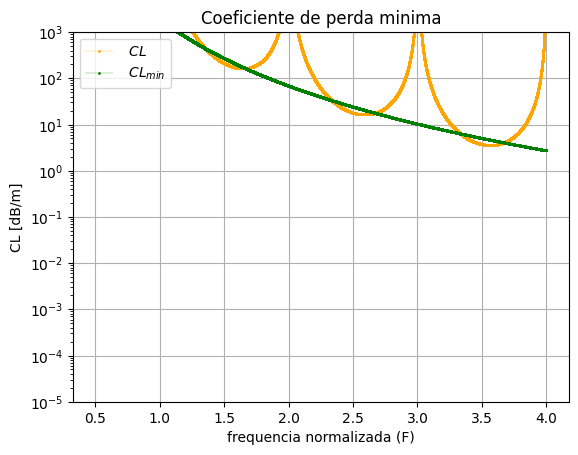

In [5]:
plt.figure()
t=10**(-6)
rext= 9*10**(-6)
R=20*10**(-6)
n=1.45
gama = 0.003
ni = 12
u=12
ff = np.arange(0.5,4,10**(-4))
plt.plot(ff,CL(ff, n, t, gama, ni, u, rext, R),
             label = ' $CL$', color = 'orange',
             marker = 'o' , markersize=1, lw = 0.2)

plt.plot(ff,CLmin(ff, n, t, gama, ni, u, rext, R),
             label = ' $CL_{min}$', color = 'g',
             marker = 'o' , markersize=1, lw = 0.2)

plt.title('Coeficiente de perda minima')
plt.yscale('log')
plt.grid(True)
plt.ylim(1e-5, 1e3)
plt.xlabel("frequencia normalizada (F)")
plt.ylabel("CL [dB/m]")
plt.legend()
#plt.savefig('coeficiente de perda F(0.5,4).png')


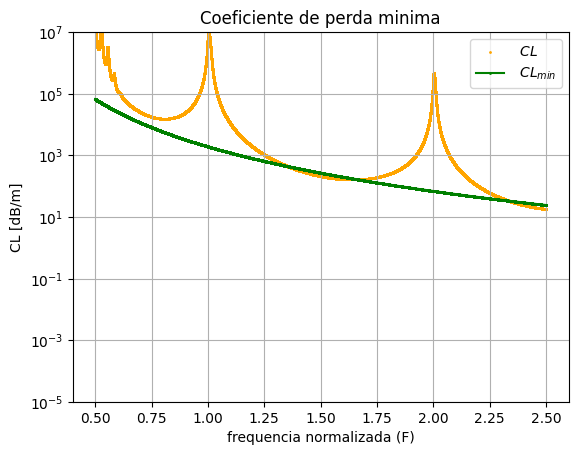

In [6]:
plt.figure()
t=10**(-6)
rext= 9*10**(-6)
R=20*10**(-6)
n=1.45
gama = 0.003
ni = 12
u=12
ff = np.arange(0.5,2.5,10**(-5))
#plt.plot(ff,CL(ff, n, t, gama, ni, u, rext, R),
#            label = ' $CL$', color = 'orange',
#            marker = 'o' , markersize=3)

plt.scatter(ff,CL(ff, n, t, gama, ni, u, rext, R),
             label = ' $CL$', color = 'orange', s = 1)

plt.plot(ff,CLmin(ff, n, t, gama, ni, u, rext, R),
             label = ' $CL_{min}$', color = 'g',
             marker = 'o' , markersize=1)

plt.title('Coeficiente de perda minima')
plt.yscale('log')
plt.grid(True)
plt.ylim(1e-5, 1e7)
plt.xlabel("frequencia normalizada (F)")
plt.ylabel("CL [dB/m]")
plt.legend()
#plt.savefig('coeficiente de perda F(0.5,2.5).png')


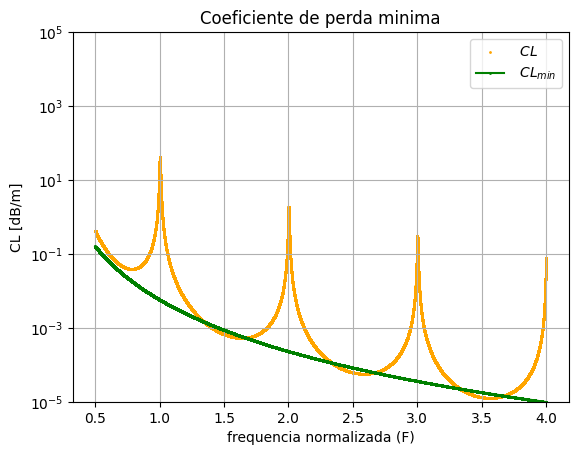

In [7]:
plt.figure()
t=0.5*10**(-6)
rext= 10*10**(-6)
R=40*10**(-6)
n=1.45
gama = 0.003
ni = 12
u=12
ff = np.arange(0.5,4,10**(-5))
#plt.plot(ff,CL(ff, n, t, gama, ni, u, rext, R),
#            label = ' $CL$', color = 'orange',
#            marker = 'o' , markersize=3)

plt.scatter(ff,CL(ff, n, t, gama, ni, u, rext, R),
             label = ' $CL$', color = 'orange', s = 1)

plt.plot(ff,CLmin(ff, n, t, gama, ni, u, rext, R),
             label = ' $CL_{min}$', color = 'g',
             marker = 'o' , markersize=1)

plt.title('Coeficiente de perda minima')
plt.yscale('log')
plt.grid(True)
plt.ylim(1e-5, 1e5)
plt.xlabel("frequencia normalizada (F)")
plt.ylabel("CL [dB/m]")
plt.legend()

## Usando um parâmetro variante

usando um único parãmetro variante, vamos relacionar as variações nos demais parâmetros do modelo. Para isso vamos ter que descrever um parâmetro em função dos outros. Por conveniência, vamos deixar tudo em função de $r_{ext}$.

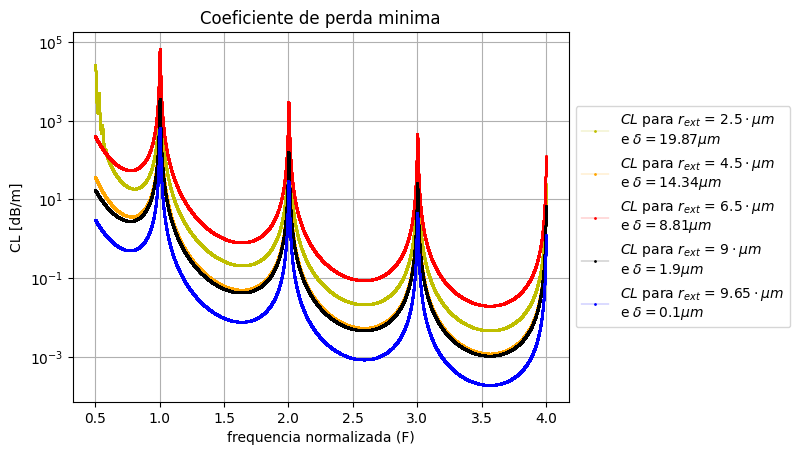

In [8]:
fig, ax = plt.subplots()
to=10**(-6)
rext0= 2.5*10**(-6)
Rtotal=35*10**(-6)
n=1.45
ni = 12
u=12
ff = np.arange(0.5,4,10**(-4))
gama = 0.003
delta, t, R = parametros(2.5*10**(-6),Rtotal,rext0,to)
ax.plot(ff,CL(ff, n, t, gama, ni, u, rext, R),
             label = '$CL$ para $r_{ext}$ = $2.5 \cdot \mu m$ \n' f'e $\delta = {round(delta*10**(6),2)} \mu m$', color = 'y',
             marker = 'o' , markersize=1, lw = 0.2)

delta, t, R = parametros(4.5*10**(-6),Rtotal,rext0,to)
ax.plot(ff,CL(ff, n, t, gama, ni, u, rext, R),
             label = '$CL$ para $r_{ext}$ = $4.5 \cdot \mu m$ \n' f'e $\delta = {round(delta*10**(6),2)} \mu m$', color = 'orange',
             marker = 'o' , markersize=1, lw = 0.2)

delta, t, R = parametros(6.5*10**(-6),Rtotal,rext0,to)
ax.plot(ff,CL(ff, n, t, gama, ni, u, rext, R),
             label = '$CL$ para $r_{ext}$ = $6.5 \cdot \mu m$ \n' f'e $\delta = {round(delta*10**(6),2)} \mu m$', color = 'r',
             marker = 'o' , markersize=1, lw = 0.2)

delta, t, R = parametros(9*10**(-6),Rtotal,rext0,to)
ax.plot(ff,CL(ff, n, t, gama, ni, u, rext, R),
             label = '$CL$ para $r_{ext}$ = $9 \cdot \mu m$ \n' f'e $\delta = {round(delta*10**(6),2)} \mu m$', color = 'black',
             marker = 'o' , markersize=1, lw = 0.2)

delta, t, R = parametros(9.65*10**(-6),Rtotal,rext0,to)
ax.plot(ff,CL(ff, n, t, gama, ni, u, rext, R),
             label = '$CL$ para $r_{ext}$ = $9.65 \cdot \mu m$ \n' f'e $\delta = {round(delta*10**(6),2)} \mu m$', color = 'b',
             marker = 'o' , markersize=1, lw = 0.2)
plt.title('Coeficiente de perda minima')
plt.yscale('log')
plt.grid(True)
#plt.ylim(1e-5, 1e3)
plt.xlabel("frequencia normalizada (F)")
plt.ylabel("CL [dB/m]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('coeficiente de perda e rext variante F(0.5,4).png')

In [8]:
delta, t, R = parametros(9.65*10**(-6),Rtotal,rext0,to)

## Vamos automatizar o processo de variar $r_{ext}$

Para fazer isso faremos uma função que recebe os parametros constantes iniciais, e uma lista de raio externos, e plota em um mesmo gráfico todos eles. 

C:\Users\duanny.onorio\AppData\Local\Temp\ipykernel_9992\687644974.py:34: RuntimeWarning: divide by zero encountered in divide
  CL = ((5*10**(-4))*((((2*t/F)*np.sqrt(n**2-1))**4.5)/(Rco**4))*


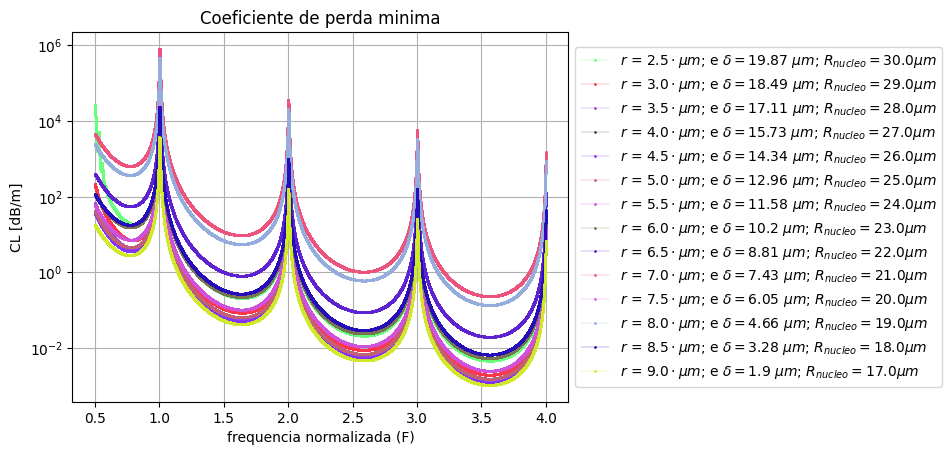

In [9]:
# criando uma lista de cores
def cores(n):
    #n representa o numero de cores que precisamos:
    import random as rd
    lista_de_cores = []
    for i in range(n):
        vermelho = rd.random()
        verde = rd.random()
        azul = rd.random()
        cor = (vermelho, verde, azul)
        lista_de_cores.append(cor)
    return lista_de_cores



def plota_varios_r_ext(list_r_ext, t0, rext0, Rtotal, gama, n, ni, u, fn0, fnfinal):
    ff = np.arange(fn0,fnfinal,10**(-4))
    lista_cores = cores(len(list_r_ext))
    contador = 0
    for i in list_r_ext:
        a = round(i*10**(6),1)
        delta, t, R = parametros(i,Rtotal,rext0,t0)
        ax.plot(ff,CL(ff, n, t, gama, ni, u, rext, R),
                 label = f'$r$ = ${a} \cdot \mu m$; e $\delta = ${round(delta*10**6,2)} $\mu m$;'' $R_{nucleo}=$'f'{round(R*10**(6),2)}$\mu m$', 
                 color = lista_cores[contador],
                marker = 'o' , markersize=1, lw = 0.2)
        contador+=1

    
    
t0=10**(-6)
rext0= 2.5*10**(-6)
Rtotal=35*10**(-6)
n=1.45
ni = 12
u=12
gama = 0.003

fig, ax = plt.subplots()
r_list = np.arange(2.5*10**(-6),9*10**(-6), 0.5*10**(-6))
plota_varios_r_ext(r_list, t0, rext0, Rtotal, gama, n, ni, u, 0.5, 4)

plt.title('Coeficiente de perda minima')
plt.yscale('log')
plt.grid(True)
#plt.ylim(1e-5, 1e3)
plt.xlabel("frequencia normalizada (F)")
plt.ylabel("CL [dB/m]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('coeficiente de perda e rext variante 14 amostras F(0.5,4).png')


# Varredura de vários raios de casca e varias amostras de raios externos 

1) Primeiro vamos devinir uma função que acha o maior raio externo, dado o valores de espessura, raio externo inicial, raio da casca e n.

2) Vamos criar uma função que plota um gráfico para cada R da capa com titulo especifico e salva essa figura com um nome específico.

In [10]:
#Encontrando o maior rext possivel
def Maior_rext(p, R_total, rexo, to, N=8):
    "p é a precisão com que você quer se aproximar do delta"
    varredura = np.arange (rexo, R, p)
    for i in varredura:
        delta, t, Rin = parametros(i, R_total, rexo, to)
        if delta > 0:
            r_max = i
        else:
            break
    return r_max

t0=10**(-6)
rext0= 2.5*10**(-6)
Rtotal=45*10**(-6)
Maior_rext(1*10**(-6), Rtotal, rext0, to)

1.1499999999999998e-05

In [11]:
def plota_grafico_para_R_Cl(t0, rext0, Rtotal_i, Rtotal_f, gama, n, ni, u, fn0, fnfinal):
    
    R_lista = np.arange(Rtotal_i, Rtotal_f,5*10**(-6))
    p = 1*10**(-6)
    i = 0
    fig, axs = plt.subplots(len(R_lista), 1, figsize = (15,60))
    for Rtotal in R_lista:
        r_list = np.arange(rext0,Maior_rext(p, Rtotal, rext0, to, N=8), 1*10**(-6))
        ff = np.arange(fn0,fnfinal,10**(-4))
        lista_cores = cores(len(r_list))
        contador = 0

        for j in r_list:
            a = round(j*10**(6),1)
            delta, t, R = parametros(j,Rtotal,rext0,t0)
            axs[i].plot(ff,CL(ff, n, t, gama, ni, u, rext, R),
                    label = f'$r$ = ${a} \cdot \mu m$; e $\delta = ${round(delta*10**6,2)} $\mu m$;'' $R_{nucleo}=$'f'{round(R*10**(6),2)}$\mu m$', 
                    color = lista_cores[contador],
                    marker = 'o' , markersize=1, lw = 0.2)
            contador+=1
        axs[i].set_title('Coeficiente de perda minima para $R_{casca}=$'f'{round(Rtotal*10**6,2)}''$\mu m$')
        axs[i].set_xlabel('Frequencia normalizada (F)')
        axs[i].set_ylabel('CL [dB/m]')
        axs[i].grid(True)
        axs[i].set_yscale('log')
        axs[i].set_ylim(0, 1e3)
        axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))


        i+=1
    #plt.savefig(f'coeficiente loss para raio da casca entre {round(Rtotal_i*10**6,2)} e {round(Rtotal_f*10**6,2)}.png')
    fig.tight_layout()
    plt.show()
        



C:\Users\duanny.onorio\AppData\Local\Temp\ipykernel_21968\1697093956.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i].set_ylim(0, 1e3)
C:\Users\duanny.onorio\AppData\Local\Temp\ipykernel_21968\687644974.py:34: RuntimeWarning: divide by zero encountered in divide
  CL = ((5*10**(-4))*((((2*t/F)*np.sqrt(n**2-1))**4.5)/(Rco**4))*


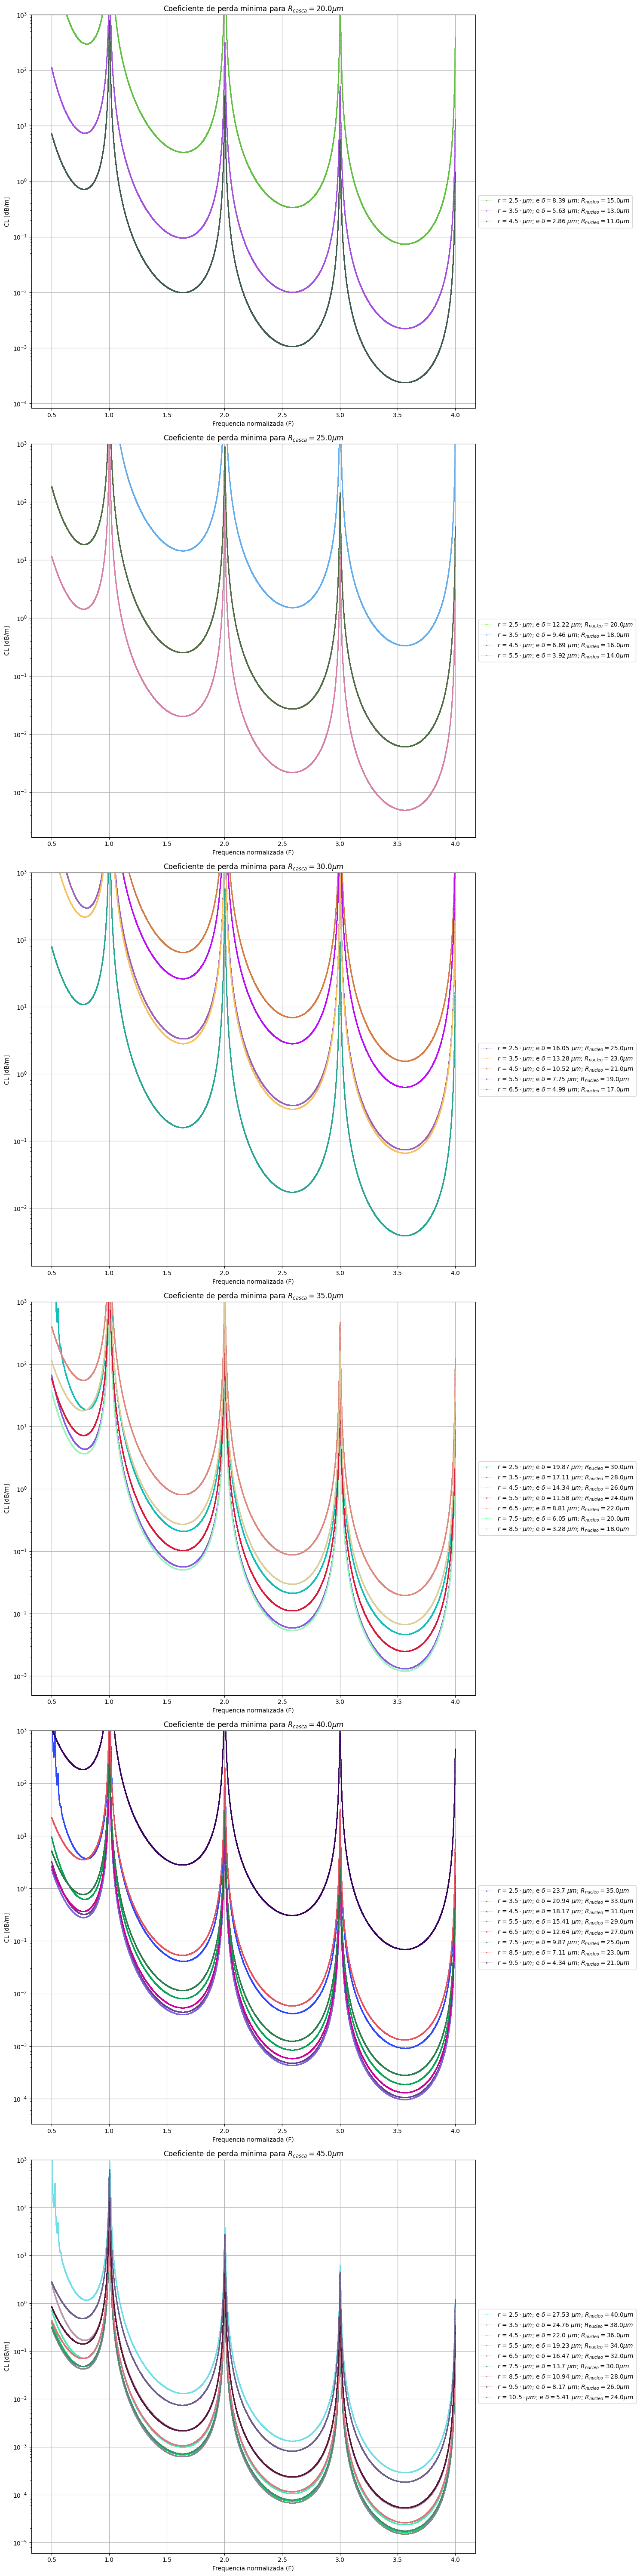

In [12]:
t0=10**(-6)
rext0= 2.5*10**(-6)
Rtotal_f=46*10**(-6)
Rtotal_i=20*10**(-6)
fn0 = 0.5
fnfinal = 4


plota_grafico_para_R_Cl(t0, rext0, Rtotal_i, Rtotal_f, gama, n, ni, u, fn0, fnfinal)

# SSL

Vamos plotar outro tipo de perda da fibra óptica relacionada ao espalhamento na rugosidade do material

Vamos acrescentar algumas funções para essa perda:


In [12]:
def parametros(rex, R, rexo, to, N=8):
    theta = 2*np.pi/N
    delta = np.sqrt(2*((R-rex)**2)*(1-np.cos(theta)))-2*rex
    print("para o raio:",rex, "o delta é:", delta)
    t = rex - np.sqrt(rex**2-2*rexo*to+to**2)
    Rin = R-2*rex
    return delta, t, Rin

def frequencia(t,n,F):
    lb = ((2*t)/F)*np.sqrt(n**2-1)
    return lb

def L_F(F1, gama):
    L = (gama**2)/(gama**2+F1**2)
    return L

def FHE(F, n, t, ni, u, rext):
    if ni > 1:
        F_HE = ((0.03/(n**0.3))*((2/ni)**1.2)*(abs(u-0.8))*
                (t/rext)+ni-1)
    elif ni == 1:
        F_HE = (abs(0.21+0.175*u-0.1/((u-0.35)**2))*
            (t*rext)**(0.55+5*0.001*np.sqrt(n**4-1))+
            0.04*np.sqrt(u)*(t/rext))
    return F_HE

def FEH(F, n, t, ni, u, rext):
    if ni >1:
        F_EH = (((11.5)/((ni**1.2)*(7.75-ni)))*
            ((0.34+((u/4)*((n/1.2)**1.15)))/((u+0.2/n)**0.15))*
                (1/rext)**
                (0.75+(0.06/(n**1.15))+0.1*np.sqrt(1.44/n)*(ni-2))+
                ni - 1)
    elif ni == 1:
        F_EH = ((0.73+0.57*((u**0.8+1.5)/4)-(0.04/(u-0.35)))*
            ((t/rext)**(0.5-(n-1)/(10*((u+0.5)**0.1)))))
    return F_EH

def Elmin(F, t, n, Rco):
    lb = frequencia(t,n,F)
    EL = 0.63*((lb/Rco)**2)*(1/Rco)
    return EL

def El(F, n, t, gama, ni, u, rext, R, A):
    E = 0
    iteravel = np.arange(1,ni+1,1)
    Rco = R - 2* rext
    for ni1 in iteravel:
        F_HE = FHE(F, n, t, ni1, u, rext)
        F_EH = FEH(F, n, t, ni1, u, rext)
        L1 = L_F(F-F_HE, gama)
        L2 = L_F(F-F_EH, gama)
        E += (L1+L2)
    return E*A*Elmin(F, t, n, Rco)

def SSL(F, n, t, gama, ni, rext, R, A = 4.4*10**3,
        eta = 300*10**(-6), lb0 = 1700*(10**(-9)), u=1):
    lb = frequencia(t,n,F)
    ssl = eta*El(F, n, t, gama, ni, u, rext, R, A)*(lb0/lb)**3
    return ssl/1000




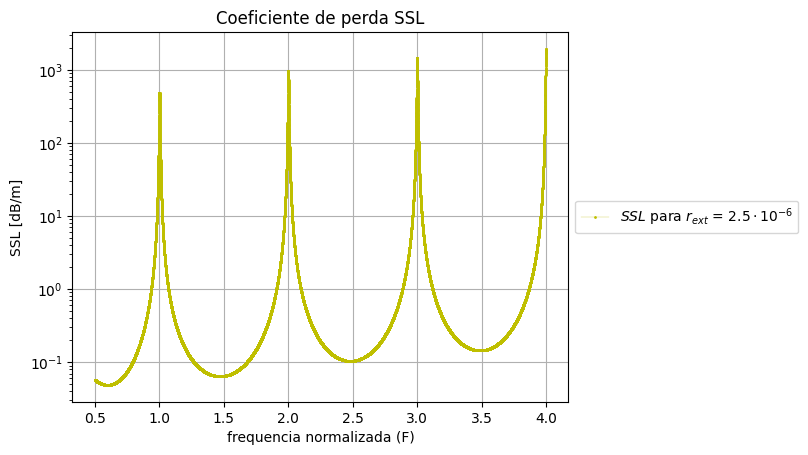

In [13]:
plt.figure()
t=0.50 * 10**(-6)
rext= 10* 10**(-6)
R=40* 10**(-6)
n=1.45
ni = 8
u = 12
ff = np.arange(0.5,4,10**(-4))
gama = 0.003
plt.plot(ff,1000*SSL(ff, n, t, gama, ni, rext, R),
             label = '$SSL$ para $r_{ext}$ = $2.5 \cdot 10^{-6}$', color = 'y',
             marker = 'o' , markersize=1, lw = 0.2)
plt.title('Coeficiente de perda SSL')
plt.yscale('log')
plt.grid(True)
#plt.ylim(1e-5, 1e3)
plt.xlabel("frequencia normalizada (F)")
plt.ylabel("SSL [dB/m]")
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('SSL sozinho F(0.5,4).png')

# Como o SSL varia com o raio externo

para o raio: 2.4999999999999998e-06 o delta é: 2.7528091751032625e-05
para o raio: 3.4999999999999995e-06 o delta é: 2.476272488630245e-05
para o raio: 4.499999999999999e-06 o delta é: 2.1997358021572265e-05
para o raio: 5.499999999999999e-06 o delta é: 1.9231991156842093e-05
para o raio: 6.499999999999999e-06 o delta é: 1.6466624292111914e-05
para o raio: 7.4999999999999985e-06 o delta é: 1.370125742738173e-05
para o raio: 8.499999999999998e-06 o delta é: 1.0935890562651556e-05
para o raio: 9.499999999999997e-06 o delta é: 8.170523697921374e-06
para o raio: 1.0499999999999998e-05 o delta é: 5.405156833191196e-06
para o raio: 1.1499999999999998e-05 o delta é: 2.639789968461017e-06
para o raio: 1.2499999999999997e-05 o delta é: -1.2557689626916521e-07


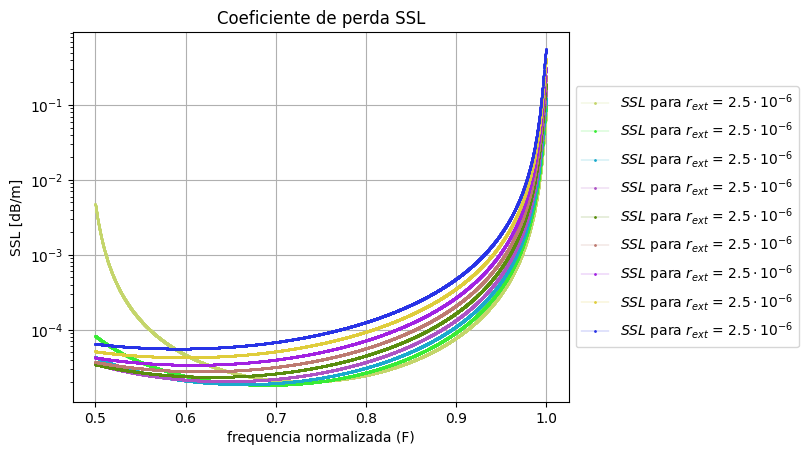

In [14]:
def graf_SSL_rext_variando(F0, Ff, n, t, gama, ni, rext0, R, A = 4.4*10**3,
        eta = 300*10**(-6), lb0 = 1700*(10**(-9)), u=1):
    ff = np.arange(F0,Ff,10**(-4))
    p = 1*10**(-6)
    raio_ext_lista = np.arange(rext0, Maior_rext(p, Rtotal, rext0, to, N=8), 1*10**(-6))

    lista_cores = cores(len(raio_ext_lista))
    contador = 0
    
    for rext in raio_ext_lista:
        plt.plot(ff,SSL(ff, n, t, gama, ni, rext, R),
                 label = '$SSL$ para $r_{ext}$ = $2.5 \cdot 10^{-6}$', color = lista_cores[contador],
                 marker = 'o' , markersize=1, lw = 0.2)
        
        contador+=1
    plt.title('Coeficiente de perda SSL')
    plt.yscale('log')
    plt.grid(True)
    #plt.ylim(1e-5, 1e3)
    plt.xlabel("frequencia normalizada (F)")
    plt.ylabel("SSL [dB/m]")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.savefig('SSL sozinho para varios r externos ampliado F(0.5,1).png')

graf_SSL_rext_variando(0.5, 1, n, t, gama, ni, rext0, R, A = 4.4*10**3,
        eta = 300*10**(-6), lb0 = 1700*(10**(-9)), u=1)

In [30]:
## definindo a perda total

def total_loss(F, n, t, gama, ni, u, rext, R):
   Total =  (1000*CL(F, n, t, gama, ni, u, rext, R) 
             + 1000*SSL(F,n,t,gama,ni,rext, R))
   return Total


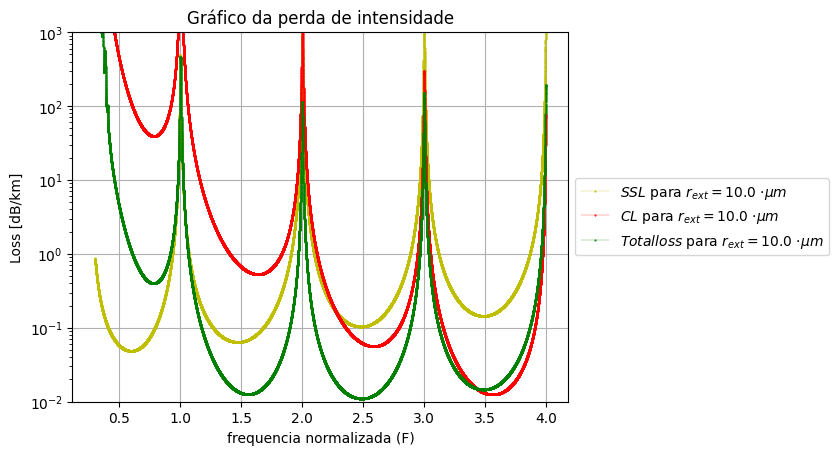

In [35]:
fig, ax = plt.subplots()
t=0.50 * 10**(-6)
rext= 10* 10**(-6)
R=40* 10**(-6)
n=1.45
ni = 8
u = 12
ff = np.arange(0.3,4,10**(-4))
gama = 0.003

ax.plot(ff,1000*SSL(ff, n, t, gama, ni, rext, R),
             label = '$SSL$ para $r_{ext} =$'f'{round(rext*10**6,2)} ''$\cdot \mu m$',
             color = 'y',
             marker = 'o' , markersize=0.5, lw = 0.2)

ax.plot(ff,1000*CL(ff, n, t, gama, ni, u, rext, R),
             label = '$CL$ para $r_{ext} =$'f'{round(rext*10**6,2)} ''$\cdot \mu m$',
             color = 'r',
             marker = 'o' , markersize=0.5, lw = 0.2)


ax.plot(ff,total_loss(ff, n, t, gama, ni, u, rext, R),
             label = '$Total loss$ para $r_{ext} = $'f'{round(rext*10**6,2)} ''$\cdot \mu m$',
             color = 'g',
             marker = 'o' , markersize=0.5, lw = 0.2) 

plt.title('Gráfico da perda de intensidade')
plt.yscale('log')
plt.grid(True)
plt.ylim(1e-2, 1e3)
plt.xlabel("frequencia normalizada (F)")
plt.ylabel("Loss [dB/km]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(f'Total loss SSL e CL F(0.5,4) e raio externo {round(rext*10**6,2)} micrometros.png')

# Perda por microcurvaturas MBL

Agora é fundamental incorporar mais um tipo de perda, as perdas por microcurvaturas. 

In [36]:
def lamb(F,t,n):
    l = (2*t/F)*np.sqrt(n**2-1)
    return l

def fi_beta(F,t,n,Rcoeff):
    fb = 8/(
        (
            ((t*np.sqrt(n**2-1))/(2*np.pi*Rcoeff**2))*
            ((2.4048**2-3.8317**2)/F)
        )**2
    )
    return fb

def delta(F,t,n,rext, Rco):
    R = 2*rext+Rco
    d = np.sqrt(2*((R-rext)**2)*(1-np.cos(2*np.pi/8))) - 2*rext
    return d

def Rco_eff(F,t,n,rext,Rco):
    Rcoeff1 = (1.027+0.001*(F+2/(F**4)))
    Rcoeff2 = np.sqrt(Rco**2+((3*8*rext**2)/(64*np.pi))*
                      (1+(3+(20*lamb(F,t,n))/Rco)*
                       (delta(F,t,n,rext, Rco)/rext)))
    return Rcoeff1*Rcoeff2

def Li(F,F0):
    li = (F0**2-F**2)/(
        (F**2-F0**2)**2+(0.003**2)*(F)**2
    )
    return li

def FHE(F, n, t, ni, u, rext):
    if ni > 1:
        F_HE = ((0.03/(n**0.3))*((2/ni)**1.2)*(abs(u-0.8))*
                (t/rext)+ni-1)
    elif ni == 1:
        F_HE = (abs(0.21+0.175*u-0.1/((u-0.35)**2))*
            (t*rext)**(0.55+5*0.001*np.sqrt(n**4-1))+
            0.04*np.sqrt(u)*(t/rext))
    return F_HE

def FEH(F, n, t, ni, u, rext):
    if ni >1:
        F_EH = (((11.5)/((ni**1.2)*(7.75-ni)))*
            ((0.34+((u/4)*((n/1.2)**1.15)))/((u+0.2/n)**0.15))*
                (1/rext)**
                (0.75+(0.06/(n**1.15))+0.1*np.sqrt(1.44/n)*(ni-2))+
                ni - 1)
    elif ni == 1:
        F_EH = ((0.73+0.57*((u**0.8+1.5)/4)-(0.04/(u-0.35)))*
            ((t/rext)**(0.5-(n-1)/(10*((u+0.5)**0.1)))))
    return F_EH

def sum_li(F, n, t, rext, ni=12, u=1):
    soma = 0
    for i in range(1,ni):
        soma+= (Li(F, FHE(F, n, t, i, 1, rext))+
                Li(F, FEH(F, n, t, i, 1, rext)))
    return soma

def del_neff(F,t,n,rext,Rco):
    d1 = ((4.5*10**(-7))/((1-t/rext)**4))
    d2 = ((lamb(F,t,n))/(Rco))**2
    soma = sum_li(F, n, t, rext)
    return (2*1000)*d1*d2*soma

def nFM_eff(F,t,n,rext,Rco):
    neff = (1-
            (
        0.5*((t*2.4048*np.sqrt(n**2-1))/
        (np.pi*Rco_eff(F,t,n,rext,Rco)*F))**2+
        del_neff(F,t,n,rext,Rco)
    )
    )
    return neff

def MBL(F,n,t,gama,ni,rext, R):
    Rco = R -2*rext
    Rcoeff = Rco_eff(F,t,n,rext,Rco)
    MBL1 = (5.415*10**(-2))*(2.4048**2)
    MBL2 = np.sqrt((8-0.68)/(8-1))
    MBL3 = (((nFM_eff(F,t,n,rext,Rco))**2)/
            (1-nFM_eff(F,t,n,rext,Rco)))
    fb = fi_beta(F,t,n,Rcoeff)
    return MBL1*MBL2*MBL3*fb

In [39]:
## definindo a perda total

def total_loss(F, n, t, gama, ni, u, rext, R):
   Total =  (1000*CL(F, n, t, gama, ni, u, rext, R) 
             + 1000*SSL(F,n,t,gama,ni,rext, R)
             + MBL(F,n,t,gama,ni,rext, R))
   
   return Total

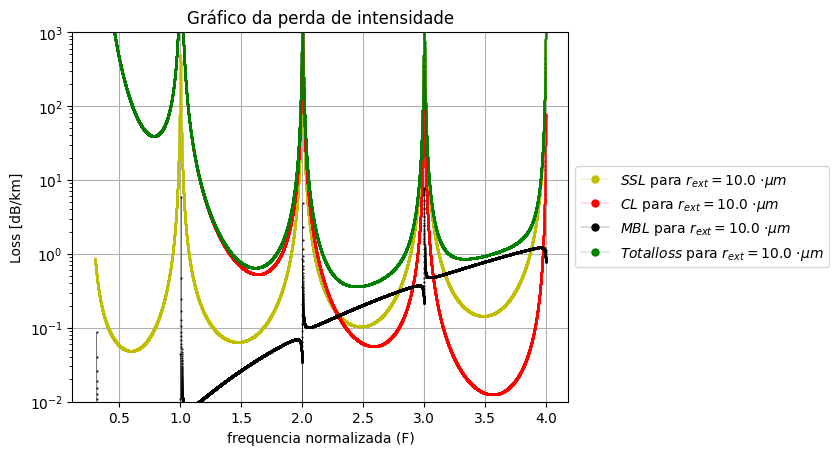

In [46]:
fig, ax = plt.subplots()
t=0.50 * 10**(-6)
rext= 10* 10**(-6)
R=40* 10**(-6)
n=1.45
ni = 8
u = 12
ff = np.arange(0.3,4,10**(-4))
gama = 0.003

ax.plot(ff,1000*SSL(ff, n, t, gama, ni, rext, R),
             label = '$SSL$ para $r_{ext} =$'f'{round(rext*10**6,2)} ''$\cdot \mu m$',
             color = 'y',
             marker = 'o' , markersize=0.5, lw = 0.2)

ax.plot(ff,1000*CL(ff, n, t, gama, ni, u, rext, R),
             label = '$CL$ para $r_{ext} =$'f'{round(rext*10**6,2)} ''$\cdot \mu m$',
             color = 'r',
             marker = 'o' , markersize=0.5, lw = 0.2)

ax.plot(ff,MBL(ff, n, t, gama, ni, rext, R),
             label = '$MBL$ para $r_{ext} =$'f'{round(rext*10**6,2)} ''$\cdot \mu m$',
             color = 'black',
             marker = 'o' , markersize=0.5, lw = 0.2)

ax.plot(ff,total_loss(ff, n, t, gama, ni, u, rext, R),
             label = '$Total loss$ para $r_{ext} = $'f'{round(rext*10**6,2)} ''$\cdot \mu m$',
             color = 'g',
             marker = 'o' , markersize=0.5, lw = 0.2) 

plt.title('Gráfico da perda de intensidade')
plt.yscale('log')
plt.grid(True)
plt.ylim(1e-2, 1e3)
plt.xlabel("frequencia normalizada (F)")
plt.ylabel("Loss [dB/km]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=10)
plt.subplots_adjust(right=0.75)
plt.savefig(f'Total loss para MBL e SSL e CL F(0.5,1) e raio externo {round(rext*10**6,2)} micrometros.png')